## Import Libraries

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc
from pandas.plotting import parallel_coordinates
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Import the hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
def plot_dendrogram(Z, names, figsize):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize=figsize)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.ylabel('distance')
    plt.axhline(y=7.15, c='grey', lw=1, linestyle='dashed')
    dendrogram(
        Z,
        color_threshold = 7.15,
        leaf_rotation=90, 
        leaf_font_size=12,
        labels = names
    )

In [3]:
palette = sns.color_palette("bright", 10)

def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

In [4]:
def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Karakteristik Cluster", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20) 

In [5]:
def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(13, 5))
    title = fig.suptitle("Karakteristik Cluster", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.rcParams["figure.figsize"] = [10,6]
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20) 

## Read data

In [12]:
data = pd.read_csv('data sosek-dem.csv')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Kabupaten/Kota                 38 non-null     object 
 1   Jumlah rumah sakit umum        38 non-null     int64  
 2   Jumlah dokter                  38 non-null     int64  
 3   Indeks pembangunan manusia     38 non-null     float64
 4   Persentase penduduk miskin     38 non-null     float64
 5   PDRB                           38 non-null     float64
 6   Total pengeluaran perkapita    38 non-null     int64  
 7   Tingkat pengangguran terbuka   38 non-null     float64
 8   Kepadatan penduduk             38 non-null     int64  
 9   Jumlah populasi                38 non-null     int64  
 10  Persentase penduduk perkotaan  38 non-null     float64
 11  Rasio jenis kelamin            38 non-null     float64
 12  Persentase Penduduk Lansia     38 non-null     float

In [14]:
high_corr = ['Jumlah rumah sakit umum', 'Jumlah dokter', 'Indeks pembangunan manusia','Persentase penduduk perkotaan', 'Total pengeluaran perkapita']
data = data.drop(high_corr, axis=1)
data.head()

,Kabupaten/Kota,Persentase penduduk miskin,PDRB,Tingkat pengangguran terbuka,Kepadatan penduduk,Jumlah populasi,Rasio jenis kelamin,Persentase Penduduk Lansia
0,Bangkalan District,20.56,17514.62,8.77,1059,1060377,97.24,12.83
1,Banyuwangi District,8.06,53295.11,5.34,295,1708114,100.27,15.84
2,Blitar District,9.33,24945.46,3.82,916,1223745,101.53,17.11
3,Bojonegoro District,12.87,69703.42,4.92,592,1301635,100.89,14.75
4,Bondowoso District,14.17,13451.77,4.13,509,776151,97.03,16.35


In [15]:
X = data.set_index('Kabupaten/Kota')
X.head()

,Persentase penduduk miskin,PDRB,Tingkat pengangguran terbuka,Kepadatan penduduk,Jumlah populasi,Rasio jenis kelamin,Persentase Penduduk Lansia
Kabupaten/Kota,,,,,,,
Bangkalan District,20.56,17514.62,8.77,1059,1060377,97.24,12.83
Banyuwangi District,8.06,53295.11,5.34,295,1708114,100.27,15.84
Blitar District,9.33,24945.46,3.82,916,1223745,101.53,17.11
Bojonegoro District,12.87,69703.42,4.92,592,1301635,100.89,14.75
Bondowoso District,14.17,13451.77,4.13,509,776151,97.03,16.35


## Normalize Data

In [16]:
scaler = StandardScaler()
X_scale= scaler.fit_transform(X)

# create dataframe
X_scaled = pd.DataFrame(X_scale, columns=X.columns, index=X.index)

In [17]:
X_scaled.head()

,Persentase penduduk miskin,PDRB,Tingkat pengangguran terbuka,Kepadatan penduduk,Jumlah populasi,Rasio jenis kelamin,Persentase Penduduk Lansia
Kabupaten/Kota,,,,,,,
Bangkalan District,2.116274,-0.385634,1.591382,-0.415340,-0.014810,-1.035929,-0.335450
Banyuwangi District,-0.657004,0.165507,-0.143630,-0.782732,0.966785,0.495815,0.655991
Blitar District,-0.375239,-0.271174,-0.912499,-0.484106,0.232762,1.132777,1.074306
Bojonegoro District,0.410153,0.418251,-0.356081,-0.639911,0.350798,0.809241,0.296964
Bondowoso District,0.698574,-0.448216,-0.755690,-0.679824,-0.445533,-1.142090,0.823976


In [18]:
X_scaled.describe()

,Persentase penduduk miskin,PDRB,Tingkat pengangguran terbuka,Kepadatan penduduk,Jumlah populasi,Rasio jenis kelamin,Persentase Penduduk Lansia
count,3.800000e+01,3.800000e+01,3.800000e+01,38.000000,3.800000e+01,3.800000e+01,3.800000e+01
mean,4.674623e-17,1.168656e-16,2.804774e-16,0.000000,1.051790e-16,2.048069e-15,9.992007e-16
std,1.013423e+00,1.013423e+00,1.013423e+00,1.013423,1.013423e+00,1.013423e+00,1.013423e+00
min,-1.582170e+00,-5.826756e-01,-1.691484e+00,-0.782732,-1.421036e+00,-3.027702e+00,-1.863783e+00
25%,-7.341014e-01,-4.557922e-01,-7.152235e-01,-0.600960,-5.650911e-01,-5.089184e-01,-8.921058e-01
50%,-1.711259e-01,-3.101359e-01,-2.220348e-01,-0.470161,7.465131e-03,2.607450e-01,1.322730e-01
75%,5.732221e-01,1.490787e-01,4.899274e-01,-0.175021,3.616861e-01,8.471552e-01,6.288167e-01
max,2.608809e+00,5.366334e+00,2.704218e+00,3.018617,2.734071e+00,1.385540e+00,2.128329e+00


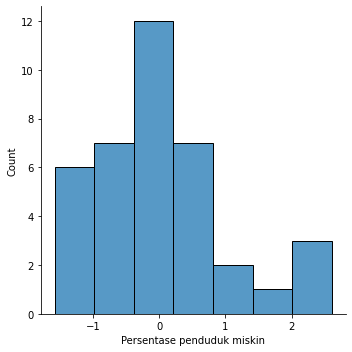

In [19]:
sns.displot(X_scaled['Persentase penduduk miskin'])

In [20]:
from sklearn.metrics.pairwise import euclidean_distances

In [21]:
dist = euclidean_distances(X_scaled, X_scaled)

In [22]:
distance = pd.DataFrame(dist)
#distance.to_csv('distance matrix.csv')

## Clustering

In [23]:
hc = AgglomerativeClustering(affinity="euclidean", linkage="ward",
                            compute_full_tree=True)
hc

AgglomerativeClustering(compute_full_tree=True)

In [24]:
hc.set_params(n_clusters=5)
clusters = hc.fit_predict(X_scaled)

# count of data points in each cluster 
np.bincount(clusters)

array([ 2, 13,  8,  5, 10], dtype=int64)

0.6496642908681671


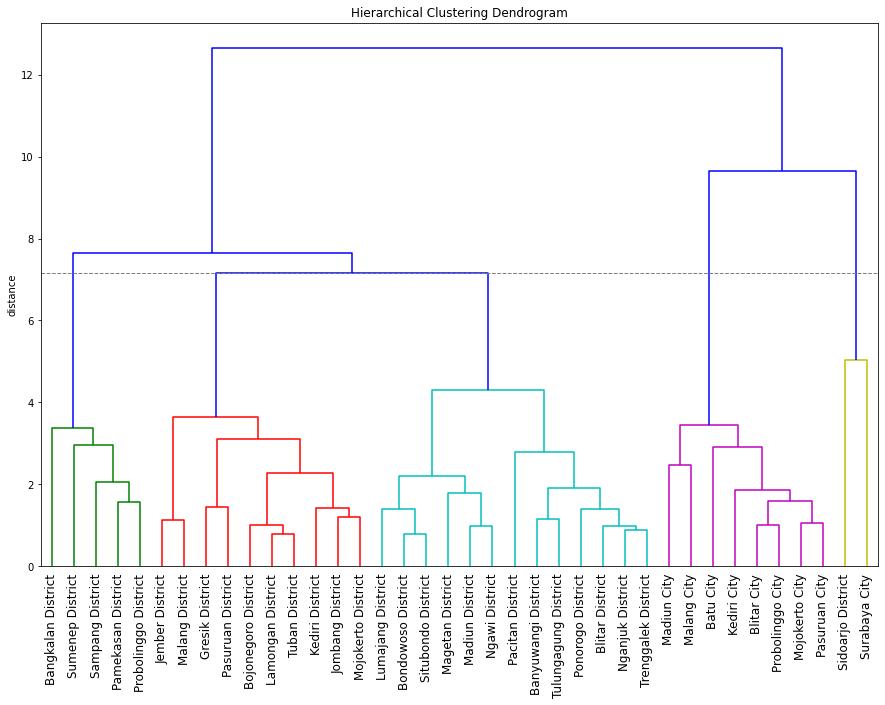

In [25]:
# show a dendrogam, just for the smallest cluster
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

sample = X_scaled
Z = linkage(sample, "ward", metric='euclidean')
Z

# cophenet coefficient
c, coph_dists = cophenet(Z, pdist(X_scaled))
print(c)

names = sample.index
plot_dendrogram(Z, names, figsize=(15, 10))

In [26]:
col_names = ['data_1', 'data_2', 'jarak', 'jumlah_anggota_cluster']
ward_linkage = pd.DataFrame(Z, columns=col_names)
ward_linkage.to_csv('linkage matrix.csv')
ward_linkage.head()

,data_1,data_2,jarak,jumlah_anggota_cluster
0,9.0,27.0,0.775761,2.0
1,4.0,24.0,0.791420,2.0
2,15.0,26.0,0.893122,2.0
3,2.0,40.0,0.973385,3.0
4,11.0,16.0,0.984907,2.0


### Visualize without denormalize

In [27]:
X_cls = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [28]:
X_cls['cluster'] = clusters
X_cls.head()

,Persentase penduduk miskin,PDRB,Tingkat pengangguran terbuka,Kepadatan penduduk,Jumlah populasi,Rasio jenis kelamin,Persentase Penduduk Lansia,cluster
Kabupaten/Kota,,,,,,,,
Bangkalan District,2.116274,-0.385634,1.591382,-0.415340,-0.014810,-1.035929,-0.335450,3
Banyuwangi District,-0.657004,0.165507,-0.143630,-0.782732,0.966785,0.495815,0.655991,1
Blitar District,-0.375239,-0.271174,-0.912499,-0.484106,0.232762,1.132777,1.074306,1
Bojonegoro District,0.410153,0.418251,-0.356081,-0.639911,0.350798,0.809241,0.296964,4
Bondowoso District,0.698574,-0.448216,-0.755690,-0.679824,-0.445533,-1.142090,0.823976,1


In [32]:
cluster_2 = X_cls.loc[X_cls['cluster'] == 2]
cluster_2.describe()

,Persentase penduduk miskin,PDRB,Tingkat pengangguran terbuka,Kepadatan penduduk,Jumlah populasi,Rasio jenis kelamin,Persentase Penduduk Lansia,cluster
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0
mean,-1.083257,-0.308681,0.728934,1.413623,-1.192095,-0.120295,-0.684183,2.0
std,0.338914,0.452898,0.634057,0.752179,0.350853,0.867257,0.555524,0.0
min,-1.582170,-0.582676,0.154812,-0.175382,-1.421036,-1.814439,-1.445468,2.0
25%,-1.370292,-0.571003,0.341971,1.215441,-1.343394,-0.452047,-0.976098,2.0
50%,-1.014203,-0.514495,0.539246,1.559871,-1.302694,-0.120927,-0.859168,2.0
75%,-0.782356,-0.331054,0.764343,1.878693,-1.240698,0.427569,-0.384034,2.0
max,-0.719126,0.644243,2.016283,2.226609,-0.343001,1.102446,0.293670,2.0


In [31]:
cluster_1 = X_cls.loc[X_cls['cluster'] == 1]
cluster_1.describe()

,Persentase penduduk miskin,PDRB,Tingkat pengangguran terbuka,Kepadatan penduduk,Jumlah populasi,Rasio jenis kelamin,Persentase Penduduk Lansia,cluster
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0
mean,0.045105,-0.361209,-0.715223,-0.597668,-0.192723,-0.051709,1.074560,1.0
std,0.543081,0.176479,0.429959,0.111075,0.464576,0.895208,0.628151,0.0
min,-0.818964,-0.488479,-1.691484,-0.782732,-0.733525,-1.445405,0.254144,1.0
25%,-0.264308,-0.454853,-0.912499,-0.679824,-0.513766,-0.722503,0.655991,1.0
50%,0.097327,-0.447785,-0.755690,-0.601921,-0.303225,0.273383,1.074306,1.0
75%,0.265943,-0.317564,-0.416781,-0.490838,0.051149,0.586809,1.334518,1.0
max,0.980339,0.165507,-0.093047,-0.428324,0.966785,1.132777,2.128329,1.0


In [33]:
cluster_3 = X_cls.loc[X_cls['cluster'] == 3]
cluster_3.describe()

,Persentase penduduk miskin,PDRB,Tingkat pengangguran terbuka,Kepadatan penduduk,Jumlah populasi,Rasio jenis kelamin,Persentase Penduduk Lansia,cluster
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,1.846933,-0.381144,-0.486586,-0.524500,-0.058692,-1.368565,-0.503435,3.0
std,0.675022,0.083854,1.221606,0.109524,0.186930,1.025386,0.544244,0.0
min,0.793975,-0.484170,-1.408217,-0.653856,-0.333534,-3.027702,-1.099617,3.0
25%,1.683643,-0.440484,-1.150241,-0.598074,-0.152233,-1.526289,-1.010683,3.0
50%,2.031967,-0.385634,-1.079424,-0.546620,-0.014810,-1.035929,-0.335450,3.0
75%,2.116274,-0.302708,-0.386431,-0.415340,0.082266,-0.955045,-0.266280,3.0
max,2.608809,-0.292722,1.591382,-0.408608,0.124851,-0.297861,0.194856,3.0


In [34]:
cluster_4 = X_cls.loc[X_cls['cluster'] == 4]
cluster_4.describe()

,Persentase penduduk miskin,PDRB,Tingkat pengangguran terbuka,Kepadatan penduduk,Jumlah populasi,Rasio jenis kelamin,Persentase Penduduk Lansia,cluster
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,0.138150,0.227581,0.108781,-0.458956,0.806696,0.789020,-0.257057,4.0
std,0.465305,0.424366,0.581328,0.145818,0.830132,0.449498,0.612633,0.0
min,-0.390770,-0.239948,-0.411723,-0.639911,0.074345,0.091394,-1.336772,4.0
25%,-0.203296,-0.161825,-0.253649,-0.562730,0.354427,0.451581,-0.547901,4.0
50%,-0.008057,0.194887,-0.130985,-0.465352,0.395470,0.887597,-0.039006,4.0
75%,0.384084,0.406090,0.249656,-0.366651,0.845322,1.151735,0.198149,4.0
max,1.084615,0.933486,1.308115,-0.174901,2.400881,1.385540,0.296964,4.0


In [35]:
cluster_0 = X_cls.loc[X_cls['cluster'] == 0]
cluster_0.describe()

,Persentase penduduk miskin,PDRB,Tingkat pengangguran terbuka,Kepadatan penduduk,Jumlah populasi,Rasio jenis kelamin,Persentase Penduduk Lansia,cluster
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0
mean,-1.268235,3.397539,2.405776,1.836376,2.134333,0.293604,-1.704033,0.0
std,0.089422,2.784297,0.422061,1.671942,0.848158,1.086681,0.225921,0.0
min,-1.331466,1.428744,2.107334,0.654135,1.534594,-0.474795,-1.863783,0.0
25%,-1.299850,2.413141,2.256555,1.245255,1.834464,-0.090596,-1.783908,0.0
50%,-1.268235,3.397539,2.405776,1.836376,2.134333,0.293604,-1.704033,0.0
75%,-1.236619,4.381936,2.554997,2.427497,2.434202,0.677804,-1.624158,0.0
max,-1.205004,5.366334,2.704218,3.018617,2.734071,1.062004,-1.544283,0.0


In [20]:
X_cls.to_csv('scaled_data_with_cluster.csv')

array([[<AxesSubplot:title={'center':'Jumlah populasi'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'Kepadatan penduduk'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'PDRB'}, xlabel='[cluster]'>],
       [<AxesSubplot:title={'center':'Persentase Penduduk Lansia'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'Persentase penduduk miskin'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'Rasio jenis kelamin'}, xlabel='[cluster]'>],
       [<AxesSubplot:title={'center':'Tingkat pengangguran terbuka'}, xlabel='[cluster]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

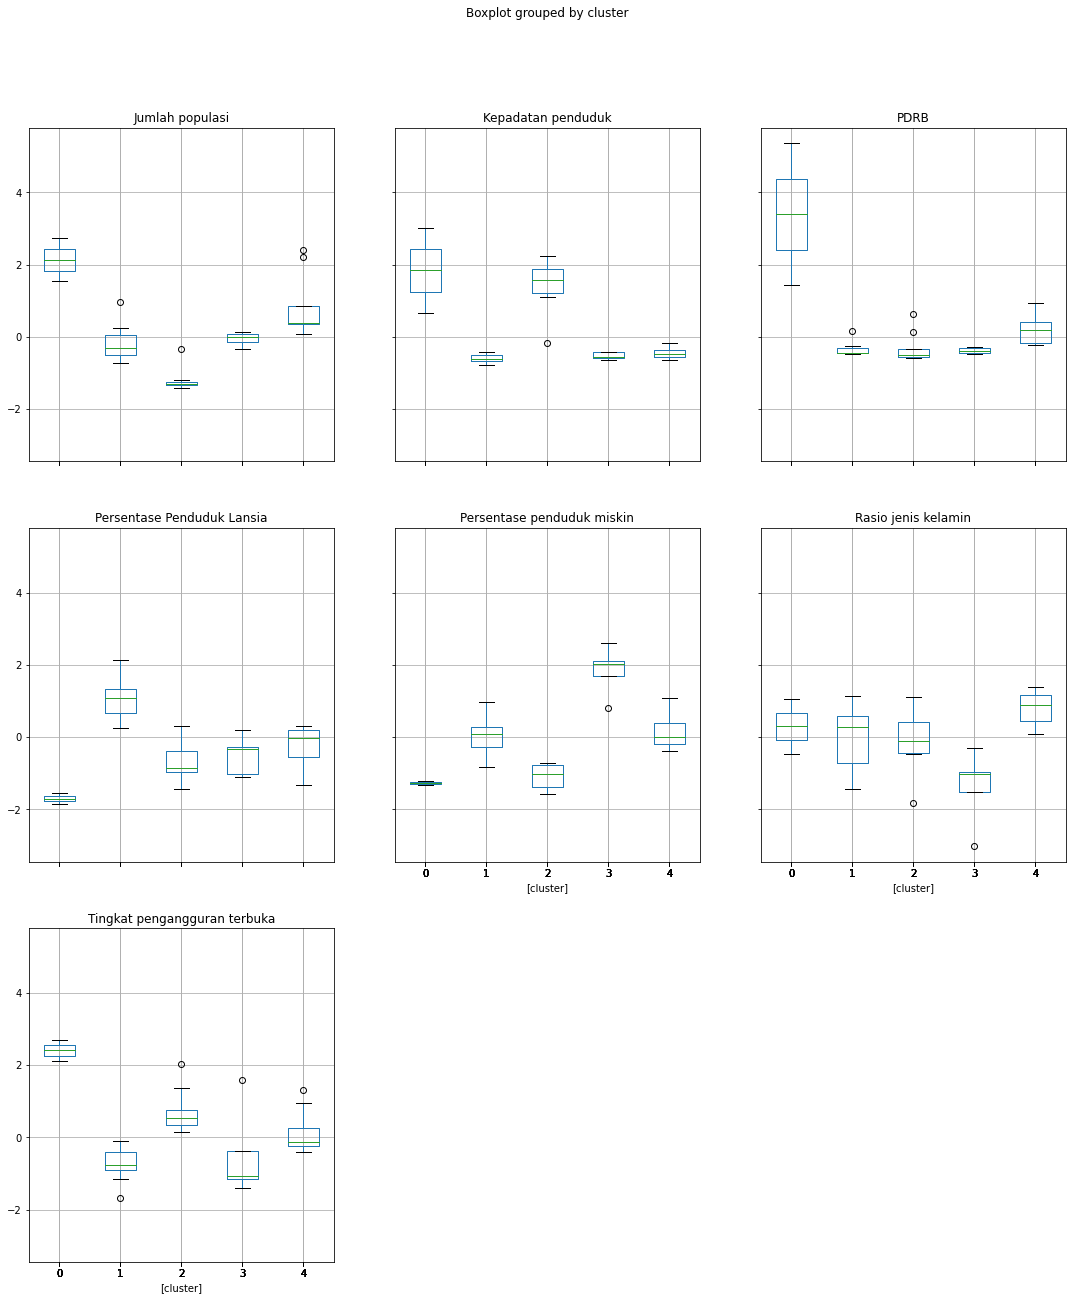

In [21]:
# identify boxplot
X_cls.boxplot(by="cluster", figsize=(18, 21), layout=(3, 3))

In [22]:
mean = X_cls.groupby(by='cluster').mean()
mean

,Persentase penduduk miskin,PDRB,Tingkat pengangguran terbuka,Kepadatan penduduk,Jumlah populasi,Rasio jenis kelamin,Persentase Penduduk Lansia
cluster,,,,,,,
0,-1.268235,3.397539,2.405776,1.836376,2.134333,0.293604,-1.704033
1,0.045105,-0.361209,-0.715223,-0.597668,-0.192723,-0.051709,1.074560
2,-1.083257,-0.308681,0.728934,1.413623,-1.192095,-0.120295,-0.684183
3,1.846933,-0.381144,-0.486586,-0.524500,-0.058692,-1.368565,-0.503435
4,0.138150,0.227581,0.108781,-0.458956,0.806696,0.789020,-0.257057


In [23]:
mean.describe()

,Persentase penduduk miskin,PDRB,Tingkat pengangguran terbuka,Kepadatan penduduk,Jumlah populasi,Rasio jenis kelamin,Persentase Penduduk Lansia
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,-0.064261,0.514817,0.408336,0.333775,0.299504,-0.091589,-0.414830
std,1.244337,1.631020,1.249555,1.189173,1.246926,0.799520,0.998201
min,-1.268235,-0.381144,-0.715223,-0.597668,-1.192095,-1.368565,-1.704033
25%,-1.083257,-0.361209,-0.486586,-0.524500,-0.192723,-0.120295,-0.684183
50%,0.045105,-0.308681,0.108781,-0.458956,-0.058692,-0.051709,-0.503435
75%,0.138150,0.227581,0.728934,1.413623,0.806696,0.293604,-0.257057
max,1.846933,3.397539,2.405776,1.836376,2.134333,0.789020,1.074560


C:\Users\Siti Nur Hasanah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Persentase penduduk miskin', ylabel='Density'>

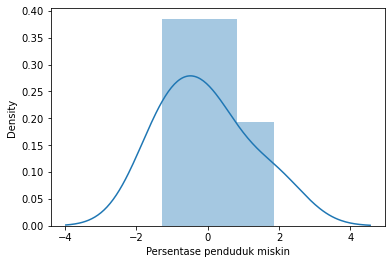

In [24]:
sns.distplot(mean['Persentase penduduk miskin'])

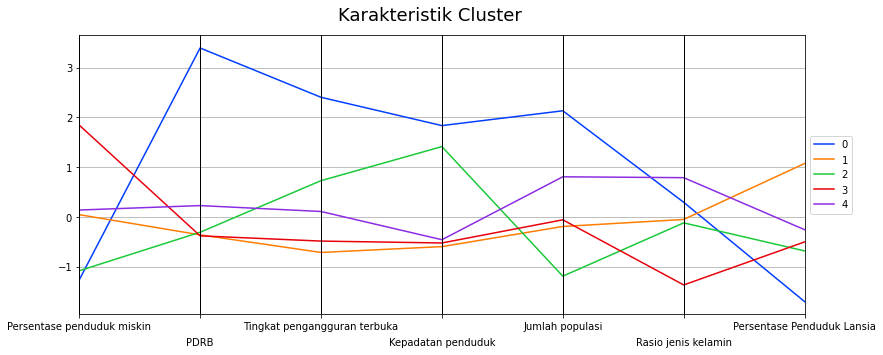

In [22]:
display_parallel_coordinates_centroids(mean.reset_index(), 5)

### Denormalize data

In [23]:
X_descaled = scaler.inverse_transform(X_scale)

In [24]:
X_clustered = pd.DataFrame(X_descaled, index=X.index, columns=X.columns)

## Visualize mean of each clusters

In [25]:
# Add the cluster number to the original scaled data
X_clustered["cluster"] = clusters

In [31]:
#X_clustered.to_csv('C:/Users/Siti Nur Hasanah/skripsi/clustering/data with cluster.csv', index=True)

In [26]:
rata2 = X_clustered.groupby(by="cluster").mean()
rata2

,Persentase penduduk miskin,PDRB,Tingkat pengangguran terbuka,Kepadatan penduduk,Jumlah populasi,Rasio jenis kelamin,Persentase Penduduk Lansia
cluster,,,,,,,
0,5.305000,263120.875000,10.380,5741.500000,2.478558e+06,99.870000,8.675000
1,11.224615,19100.321538,4.210,679.846154,9.429752e+05,99.186923,17.110769
2,6.138750,22510.455000,7.065,4862.375000,2.835081e+05,99.051250,11.771250
3,19.346000,17806.146000,4.662,832.000000,1.031420e+06,96.582000,12.320000
4,11.644000,57324.946000,5.839,968.300000,1.602474e+06,100.850000,13.068000


In [28]:
rata2.to_csv('rata-rata_cluster.csv')

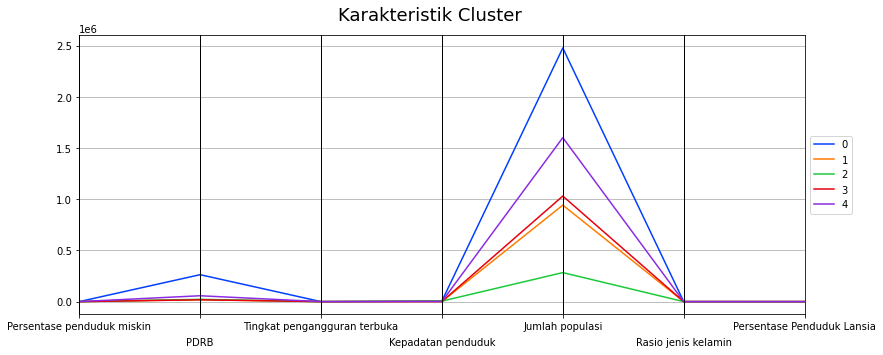

In [27]:
display_parallel_coordinates_centroids(rata2.reset_index(), 5)